### Task 2: Predicting House Prices with Linear Regression

###### Name: Yogesh Kasar (Batch: Feb Phase 2)

**Description:**

The objective of this project is to build a predictive model using linear regression to estimate a
numerical outcome based on a dataset with relevant features. Linear regression is a
fundamental machine learning algorithm, and this project provides hands-on experience in
developing, evaluating, and interpreting a predictive model

**Importing necessary libraries**

In [1]:
#importing all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**Data Colllection**

In [2]:
#Load the housing dataset
housing_data=pd.read_csv("Housing.csv")

In [3]:
##check the head of dataset
print("Display the housing data to get overview:")
housing_data.head(10)

Display the housing data to get overview:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
##check the bottom of dataset
housing_data.tail(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished
536,1960000,3420,5,1,2,no,no,no,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
538,1890000,3649,2,1,1,yes,no,no,no,no,0,no,unfurnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


**Data Exploration and Cleaning**

Exploration

In [5]:
#shape of the our dataset
print("The shape of our dataset: ",housing_data.shape)

The shape of our dataset:  (545, 13)


In this data, the data contains 545 rows and 13 columns.

Now, explore our dataset first by getting more information about rows and column.


In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


This dataset contains 6 columns are numerical  and remaining 7 are categorical type.

Now, explore the categorical columns and numerical columns.

In [7]:
#categorical columns
categorical_columns=[]
for column in housing_data.columns:
    if (housing_data[column].dtype=='object'):
        categorical_columns.append(column)
print("This is all categorical columns: ", categorical_columns)

This is all categorical columns:  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [8]:
#numerical columns
numerical_columns=[]
for column in housing_data.columns:
    if (housing_data[column].dtype!='object'):
        numerical_columns.append(column)
print("This is all numerical columns: ", numerical_columns)

This is all numerical columns:  ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [9]:
#Descriptive Statistics
print("Calculate basic Descriptive Statistics:")
housing_data.describe()

Calculate basic Descriptive Statistics:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Cleaning

Now, checking missing and duplicated values in each column.

In [10]:
#missing values
housing_data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

No missing values in this datasets

In [11]:
#duplicated values
print("Duplicated Value: ",housing_data.duplicated().sum())

Duplicated Value:  0


Zero Duplicate values in this datasets


In [12]:
#exploring the unique values of each column  
print("Unique values of each column: ")
housing_data.nunique()

Unique values of each column: 


price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

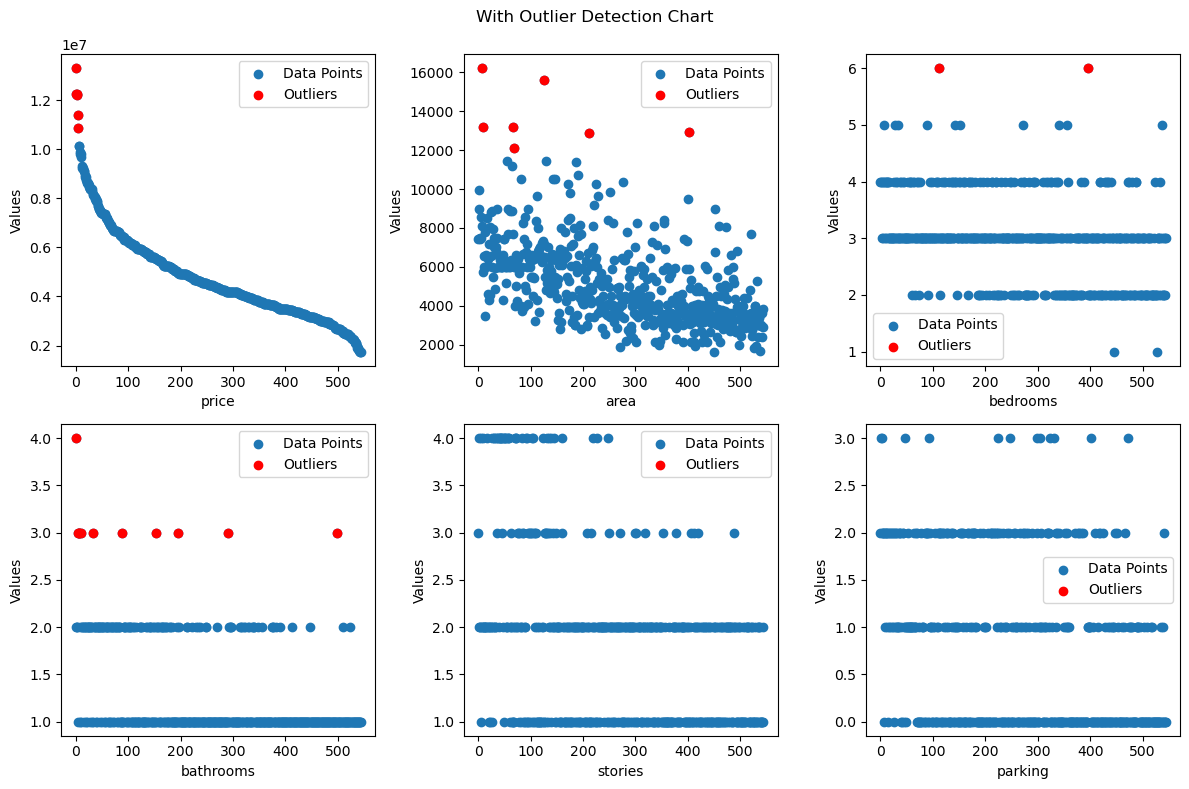

In [13]:
#Outlier detection
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for i, column in enumerate(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']):
    axs.flatten()[i].scatter(housing_data.index, housing_data[column], label='Data Points')
    z_scores = stats.zscore(housing_data[column])
    outliers = (abs(z_scores) > 3)
    axs.flatten()[i].scatter(housing_data.index[outliers], housing_data[column][outliers], color='red', label='Outliers')
    axs.flatten()[i].set_xlabel(column)
    axs.flatten()[i].set_ylabel('Values')
    axs.flatten()[i].legend()
plt.suptitle('With Outlier Detection Chart')
plt.tight_layout()
plt.show()


In that charts,It is clearly see that the price, area and bathrooms columns contains highest number of outliers.So we exclude them.



In [14]:
#removing outlier
z_scr = zscore(housing_data[['price', 'area']])
threshold = 3
outlier_mask = (abs(z_scr) > threshold).any(axis=1)
new_hhousing_data = housing_data[~outlier_mask]
new_hhousing_data
print("Total outlier mask:",outlier_mask.sum())

Total outlier mask: 13


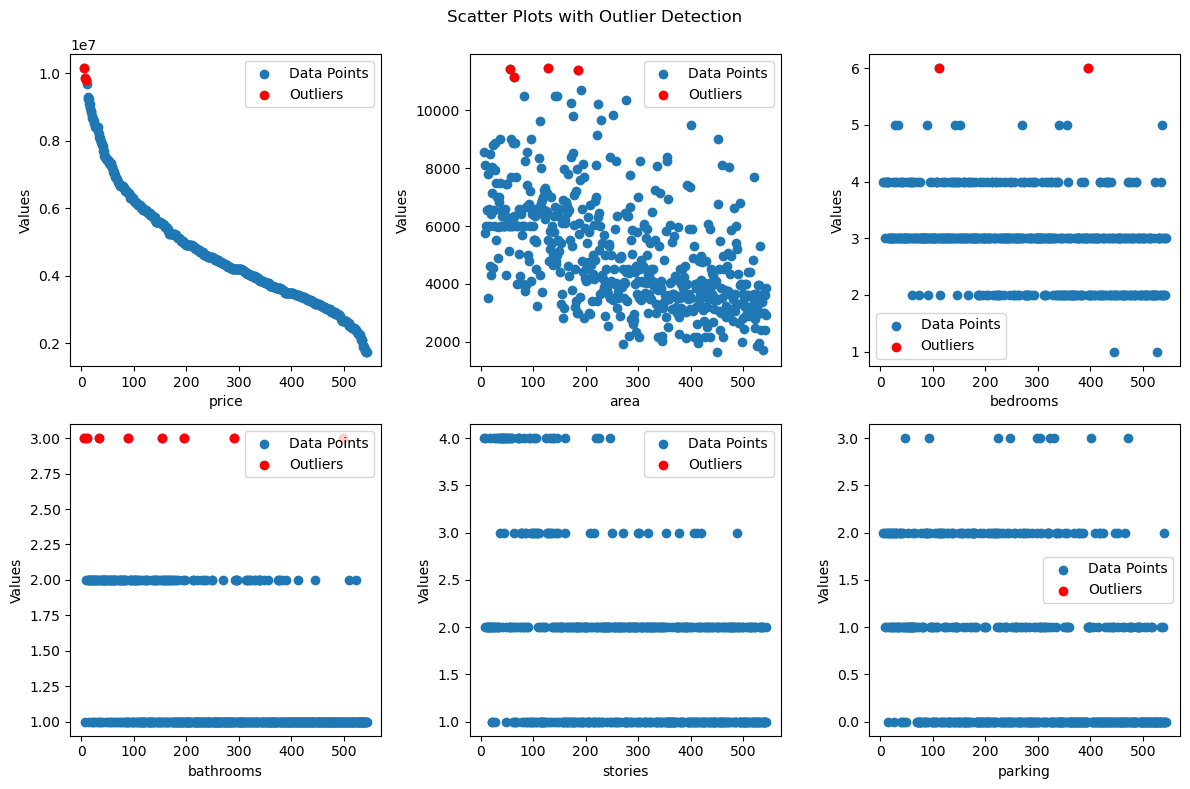

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for i, column in enumerate(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']):
    axs.flatten()[i].scatter(new_hhousing_data.index, new_hhousing_data[column], label='Data Points')
    z_scores = stats.zscore(new_hhousing_data[column])
    outliers = (abs(z_scores) > 3)
    axs.flatten()[i].scatter(new_hhousing_data.index[outliers], new_hhousing_data[column][outliers], color='red', label='Outliers')
    axs.flatten()[i].set_xlabel(column)
    axs.flatten()[i].set_ylabel('Values')
    axs.flatten()[i].legend()
plt.suptitle('Scatter Plots with Outlier Detection')
plt.tight_layout()
plt.show()

Now we can see that the outliers have been removed.



In [16]:
print("The Old shape of our dataset: ",housing_data.shape)

The Old shape of our dataset:  (545, 13)


In [17]:
print("The New shape of our dataset: ",new_hhousing_data.shape)

The New shape of our dataset:  (532, 13)


Now we can see that 13 outliers removed

Exploratory Data Analysis

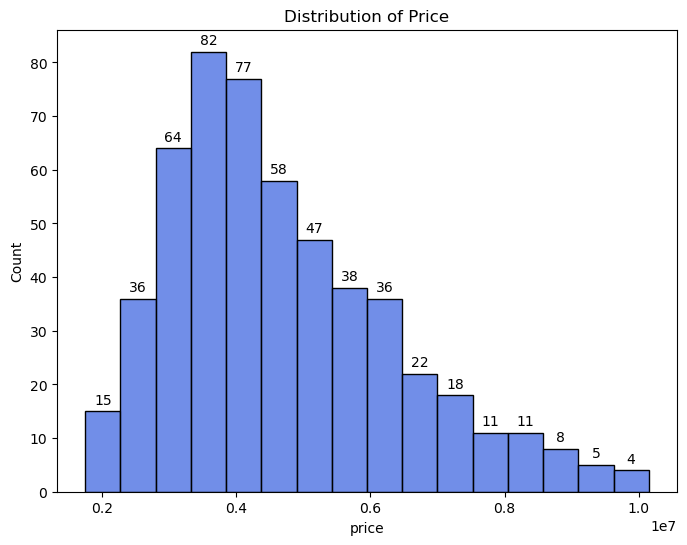

In [41]:
# Distribution of Price
plt.figure(figsize=(8, 6))
ax=sns.histplot(new_hhousing_data['price'], kde=False,color='royalblue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), 
                        textcoords='offset points')
plt.title('Distribution of Price')
plt.show()


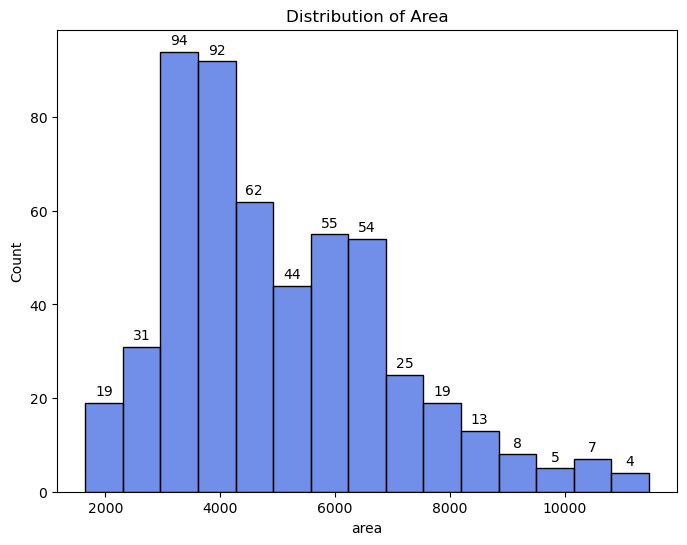

In [43]:
# Distribution of Area
plt.figure(figsize=(8, 6))
ax=sns.histplot(new_hhousing_data['area'], kde=False,color='royalblue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), 
                textcoords='offset points')
plt.title('Distribution of Area')
plt.show()


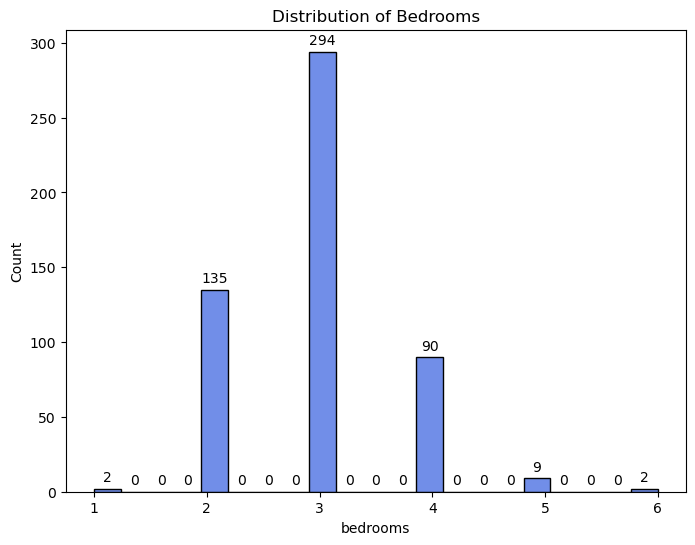

In [44]:
# Distribution of Bedrooms
plt.figure(figsize=(8, 6))
ax=sns.histplot(new_hhousing_data['bedrooms'], kde=False,color='royalblue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), 
                textcoords='offset points')
plt.title('Distribution of Bedrooms')
plt.show()

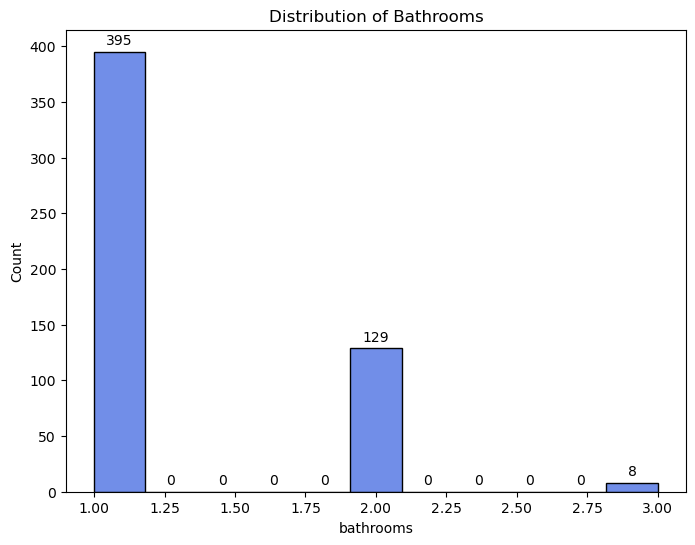

In [45]:
# Distribution of Bathrooms
plt.figure(figsize=(8, 6))
ax=sns.histplot(new_hhousing_data['bathrooms'], kde=False,color='royalblue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), 
                textcoords='offset points')
plt.title('Distribution of Bathrooms')
plt.show()

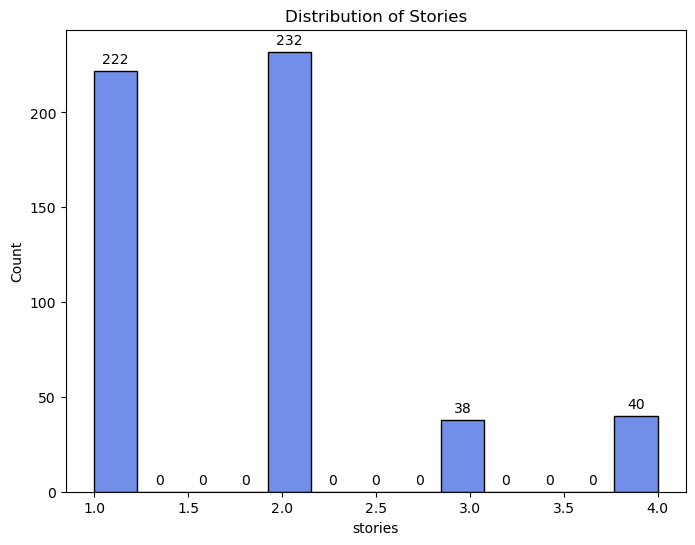

In [46]:
# Distribution of Stories
plt.figure(figsize=(8, 6))
ax=sns.histplot(new_hhousing_data['stories'], kde=False,color='royalblue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), 
                textcoords='offset points')
plt.title('Distribution of Stories')
plt.show()

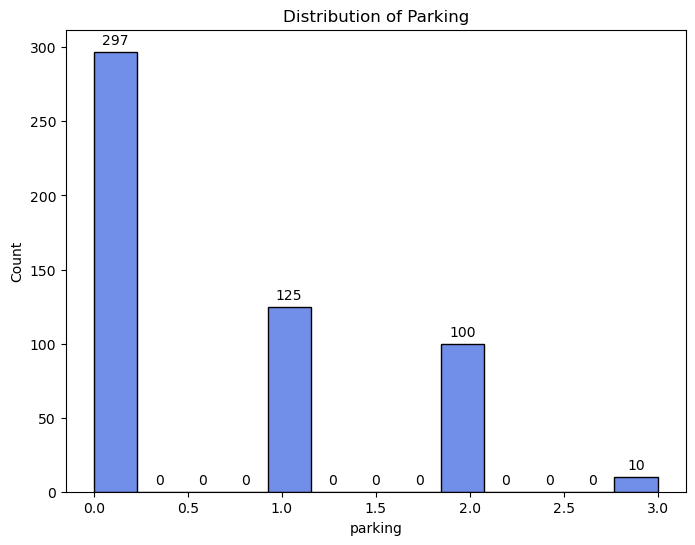

In [47]:
# Distribution of Parking
plt.figure(figsize=(8, 6))
ax=sns.histplot(new_hhousing_data['parking'], kde=False,color='royalblue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), 
                textcoords='offset points')
plt.title('Distribution of Parking')
plt.show()

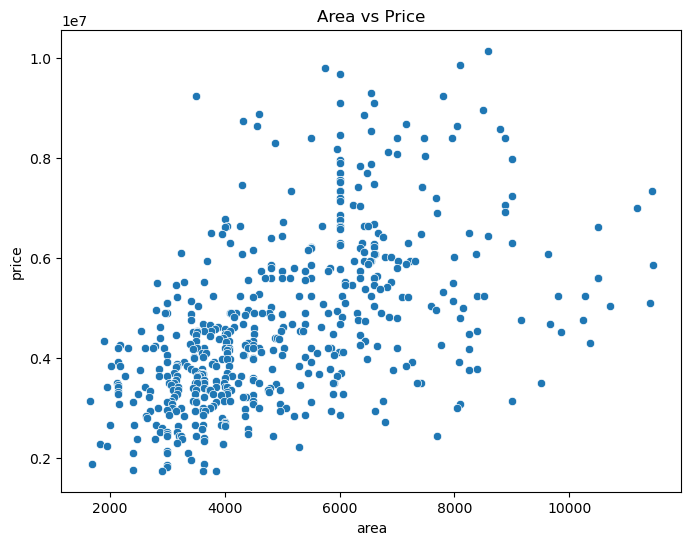

In [24]:
# Area vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='price', data=new_hhousing_data)
plt.title('Area vs Price')
plt.show()


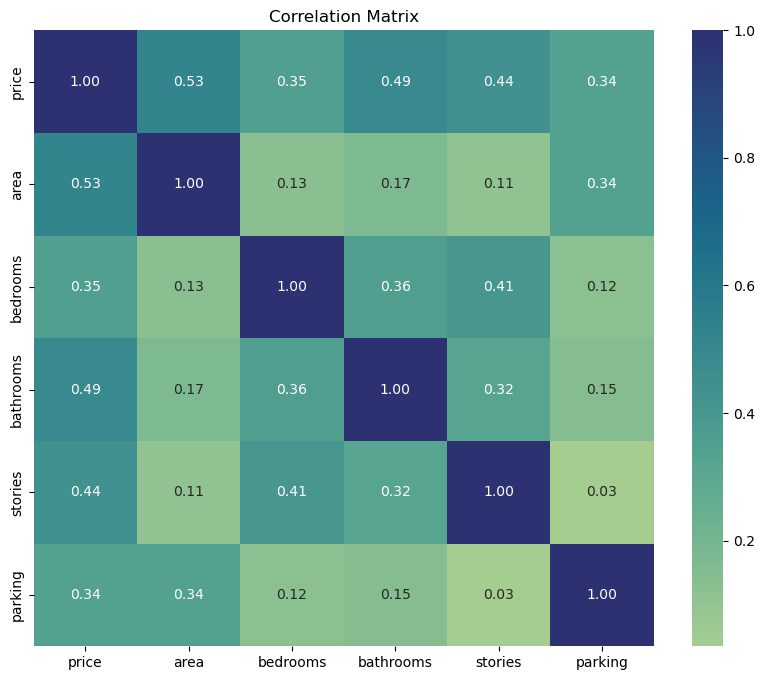

In [25]:
correlation_matrix = new_hhousing_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In this heatmap shows that area is highly correlated with price.

Data Preprocessing


In [26]:
# Encoding the categorical variables using replace
encode_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
new_hhousing_data[encode_columns] = new_hhousing_data[encode_columns].replace({'yes': 1, 'no': 0})
new_hhousing_data.head(5)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished
11,9681000,6000,4,3,2,1,1,1,1,0,2,0,semi-furnished
12,9310000,6550,4,2,2,1,0,0,0,1,1,1,semi-furnished


In [27]:
#Encoding the furnishingstatus column which contain 3 levels using get_dummies
furnish_sts = pd.get_dummies(new_hhousing_data['furnishingstatus'])
furnish_sts.head(5)

,furnished,semi-furnished,unfurnished
6,0,1,0
8,1,0,0
9,0,0,1
11,0,1,0
12,0,1,0


In [28]:
#Dropping the furnishingstatus column and combining the furnish_sts column instead
new_house_data = new_hhousing_data.drop(['furnishingstatus'],axis = 1)
new_house_data = pd.concat([new_house_data,furnish_sts],axis = 1)
new_house_data.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,0,1,0
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,0,1


Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_to_scale = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
new_house_data[features_to_scale] = scaler.fit_transform(new_house_data[features_to_scale])
new_hhousing_data.head(5)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished
11,9681000,6000,4,3,2,1,1,1,1,0,2,0,semi-furnished
12,9310000,6550,4,2,2,1,0,0,0,1,1,1,semi-furnished


**Feature Selection**

In [30]:
# Creating features (X) and target (y)
X = np.array(new_house_data.drop('price', axis=1))
y = np.array(new_house_data['price']).reshape(-1, 1)

print("Shape of features X:", X.shape)
print("Shape of features y:", y.shape)


Shape of features X: (532, 14)
Shape of features y: (532, 1)


Split training and testing data set


Now we will creating the training and testing data set

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42, shuffle=True)

we have split data on the testing data is 25% and training data is 75%

In [32]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(399, 14)
(133, 14)
(399, 1)
(133, 1)


**Model Training - linear regression**

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn. model_selection import GridSearchCV

In [34]:
#define parametes for grid search
parameter_grid={'n_features_to_select':[3,5,7,10]}
model=LinearRegression() #initializing the model
rfe=RFE(model) 

grid=GridSearchCV(estimator=rfe,param_grid=parameter_grid,scoring='neg_mean_squared_error',cv=5)
grid.fit(X_train,y_train)

best_features=grid.best_estimator_.n_features_to_select
print(f'Number of features to select: {best_features}')


Number of features to select: 10


Feature Selection

In [35]:
#feature selection
rfe_model=RFE(model,n_features_to_select=10)
X_train_rfe=rfe_model.fit_transform(X_train,y_train)
X_test_rfe=rfe_model.transform(X_test)
#Fitting the model
lm = model.fit(X_train_rfe,y_train)
y_pred = lm.predict(X_test_rfe)

In [36]:
y_test

array([[0.89166667],
       [0.10833333],
       [0.50833333],
       [0.10833333],
       [0.15833333],
       [0.34166667],
       [0.3325    ],
       [0.16666667],
       [0.23333333],
       [0.57916667],
       [0.13333333],
       [0.29583333],
       [0.575     ],
       [0.16666667],
       [0.58083333],
       [0.325     ],
       [0.3375    ],
       [0.85      ],
       [0.23333333],
       [0.225     ],
       [0.29166667],
       [0.95833333],
       [0.27916667],
       [0.54166667],
       [0.22916667],
       [0.16666667],
       [0.53333333],
       [0.25833333],
       [0.06666667],
       [0.1625    ],
       [0.18333333],
       [0.425     ],
       [0.38333333],
       [0.39583333],
       [0.56666667],
       [0.20833333],
       [0.12916667],
       [0.38333333],
       [0.73958333],
       [0.5625    ],
       [0.41416667],
       [0.62916667],
       [0.85833333],
       [0.54166667],
       [0.4       ],
       [0.09166667],
       [0.27916667],
       [0.458

In [37]:
y_pred

array([[0.50747697],
       [0.07373778],
       [0.34708648],
       [0.37779019],
       [0.34052771],
       [0.43171503],
       [0.49958008],
       [0.29515014],
       [0.18382443],
       [0.72051451],
       [0.21852682],
       [0.25462892],
       [0.58275355],
       [0.24199783],
       [0.49093229],
       [0.30804879],
       [0.29524718],
       [0.48693017],
       [0.23826167],
       [0.31144698],
       [0.25162595],
       [0.65283649],
       [0.32193218],
       [0.47035858],
       [0.20529063],
       [0.26606783],
       [0.57716942],
       [0.19105305],
       [0.13027585],
       [0.14029014],
       [0.19430329],
       [0.547716  ],
       [0.57700892],
       [0.4072915 ],
       [0.4707487 ],
       [0.20021235],
       [0.16956129],
       [0.4794194 ],
       [0.51574652],
       [0.53551108],
       [0.43172515],
       [0.66502977],
       [0.70358196],
       [0.52954321],
       [0.36158399],
       [0.17194409],
       [0.22578642],
       [0.400

**Model Evaluation**

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squar_err=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mean_squar_err)
R2Score=r2_score(y_test,y_pred)
print("R2 Score:",R2Score)

Mean Squared Error: 0.01368172249537117
R2 Score: 0.7201739613624063


**Insights:**
 - Our model is doing really well. The low MSE (0.0136) means that it's making very accurate predictions, Almost all values are correctly predicted.
 - The R-Squared value is 0.7201739613624065, indicates that our model explains 72% of the changes in the target variable

**Visualization**

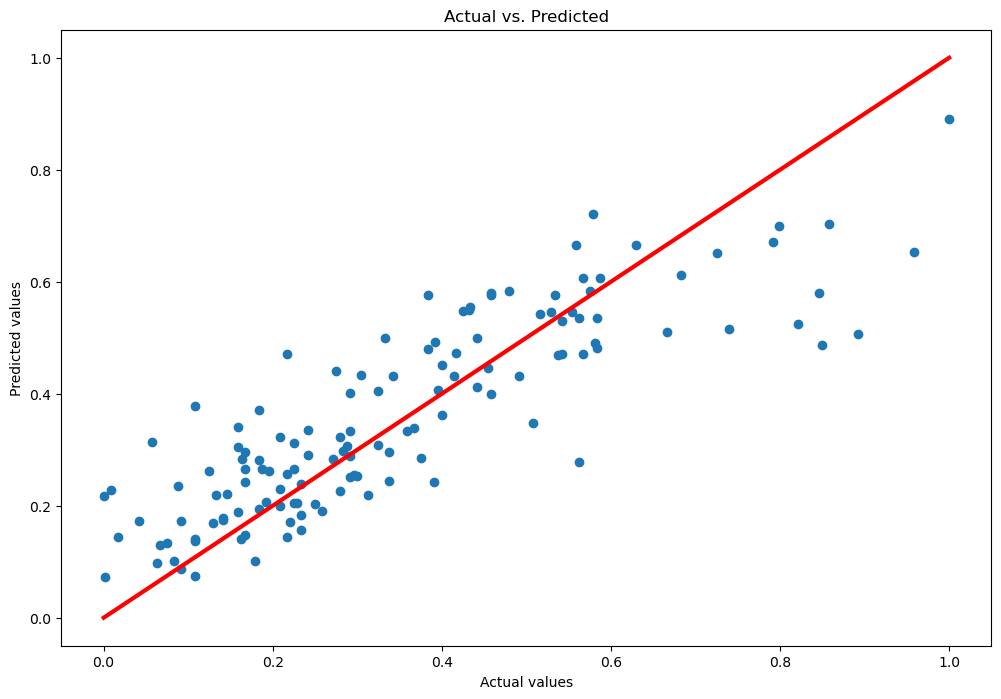

In [48]:
#Create visualizations to illustrate the relationship between the predicted and actual values.
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],linewidth = 3,color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted')
plt.show()